# PROBLEM STATEMENT(WORLD HAPPINESS REPORT PROJECT)


The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
https://github.com/dsrscientist/DSData

# Step 1 - IMPORT ALL NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

# Step 2 - LOAD DATA SET AND PERFORM DATA DESCRIPTIVE ANALYSIS

In [2]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
#checking the data shape
df.shape

(158, 12)

In [4]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
#Checking data full description
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
#checking the first five rows
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
#checking the last five rows
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [8]:
#picking 4 random samples
df.sample(4)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
92,Macedonia,Central and Eastern Europe,93,5.007,0.05376,0.91851,1.00232,0.73545,0.33457,0.05327,0.22359,1.73933
99,Mongolia,Eastern Asia,100,4.874,0.03313,0.82819,1.30060,0.60268,0.43626,0.02666,0.33230,1.34759
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
53,Kazakhstan,Central and Eastern Europe,54,5.855,0.04114,1.12254,1.12241,0.64368,0.51649,0.08454,0.11827,2.24729


In [9]:
#lets check the columns
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
#Checking for null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [11]:
#Checking the content of each Categorical columns
from collections import Counter
print("The Value Counts in region - ",Counter(df['Region']))

The Value Counts in region -  Counter({'Sub-Saharan Africa': 40, 'Central and Eastern Europe': 29, 'Latin America and Caribbean': 22, 'Western Europe': 21, 'Middle East and Northern Africa': 20, 'Southeastern Asia': 9, 'Southern Asia': 7, 'Eastern Asia': 6, 'North America': 2, 'Australia and New Zealand': 2})


# OBSERVATIONS


# The Dataset is made up of;
- 158 rows and 12 columns
- 11 features and 1 Target

# About the Features:
1. Out of the 11 features;
- Two of the features are Categorical data - Country and Region, and both are of 'Object' datatypes
- Nine of the features are Continuos data - 'Happiness Rank', 'Happiness Score','Standard Error', 'Economy (GDP per Capita)',     'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual'
- They all have null values


# About the Target/Label:

2. Happiness Score: This column shows state of happiness in the world today and how the new science of happiness explains personal and national variations in happiness. It has the following Characterics;
- It is made up of Continous data
- It has no null values
- Its Datatype is a float type

**Since the target is made up of a continous data hence this is also a REGRESSION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA)
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Encoding
- Although we cannot perform Exploratory Data Analysis on Categorical Data, encoding process is needless here because from Domain Knowledge both the country and region does not impact our Target/Label. Hence dropping them(i.e Country and Region).

In [12]:
#Extracting the continous data from the original dataset(df) and storing in Cont_features
Cont_features=['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

In [13]:
#Lets see the dataframe for the continuos data only
df_Cont=df[Cont_features]
df_Cont

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Normal Distribution Curve

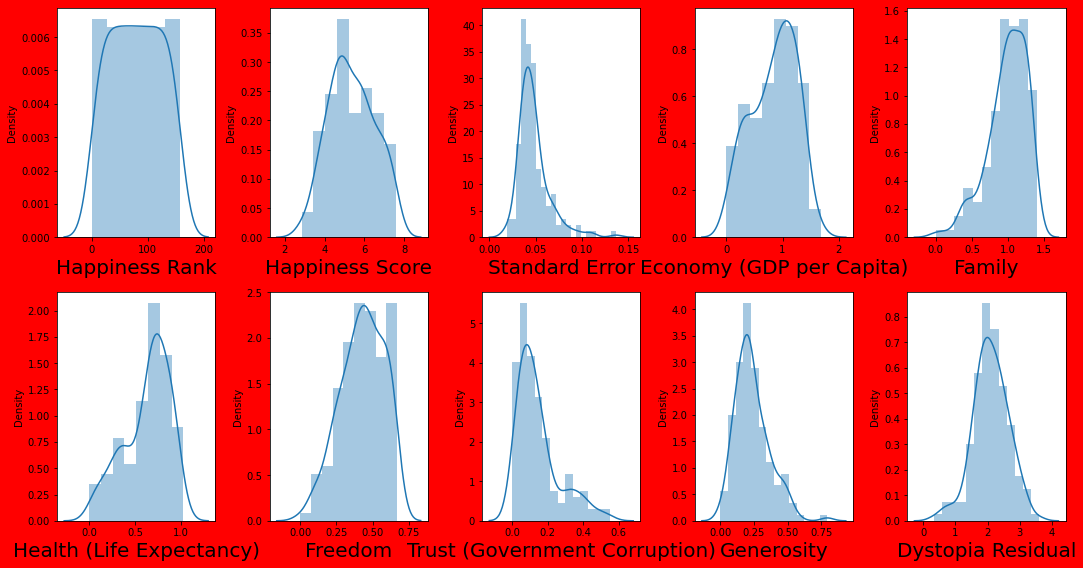

In [14]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_Cont:#triggering your for loop
    if plotnumber<=10:#since there are 10 features
        ax = plt.subplot(2,5,plotnumber)#2,5 means arrange the graphs in 2-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_Cont[column])#performing a distribution plot for all the columns starting with Happiness rank
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 10
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution
From the above density plot we can see that all features does not obey a normal distribution, the building blocks is out of normalized curve:

The normal distribution of the Happiness Score is irrelevant

# Scatter Plot
- Lets visualize the relationship between the features and the Label

In [15]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=['Happiness Rank','Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual']
df_features=df[features]
df_features

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


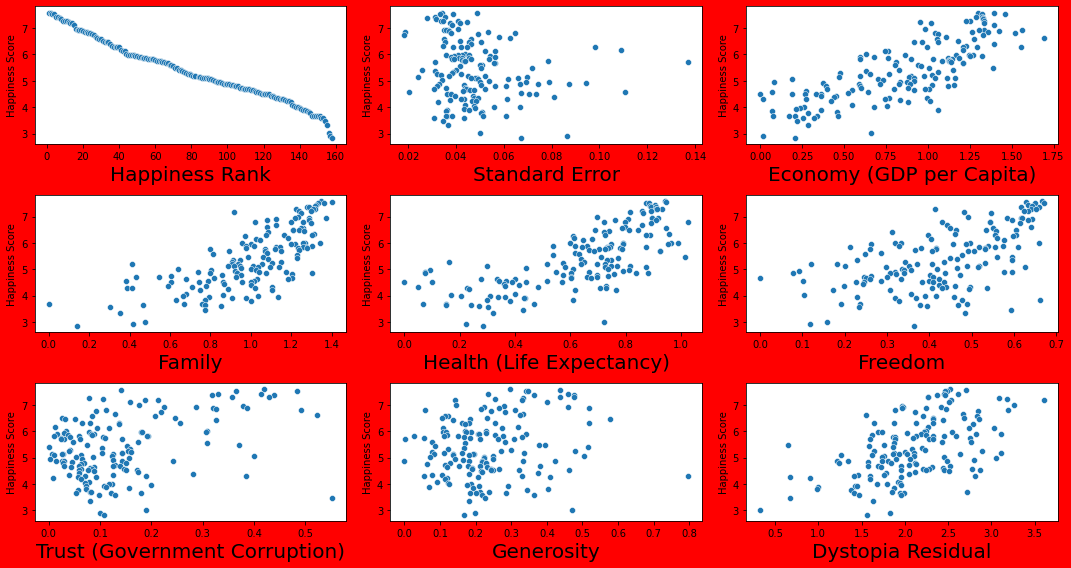

In [16]:
#Check for the relatinship between each feature and Target
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_features:#triggering your for loop
    if plotnumber<=9:#since there are 9 features
        ax = plt.subplot(3,3,plotnumber)#3,3 means arrange the graphs in 2-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=df_features[column],y=df['Happiness Score'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot
From the above scatter plot we can see a strong relationship between the Label(Happiness Score) and all features except;       
 - Happiness Rank
 - Standard Error.

# Correlation;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [17]:
#checking for general correlation
df_Cont.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [18]:
#checking for correlation between each feature and Label
df_Cont.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

<AxesSubplot:>

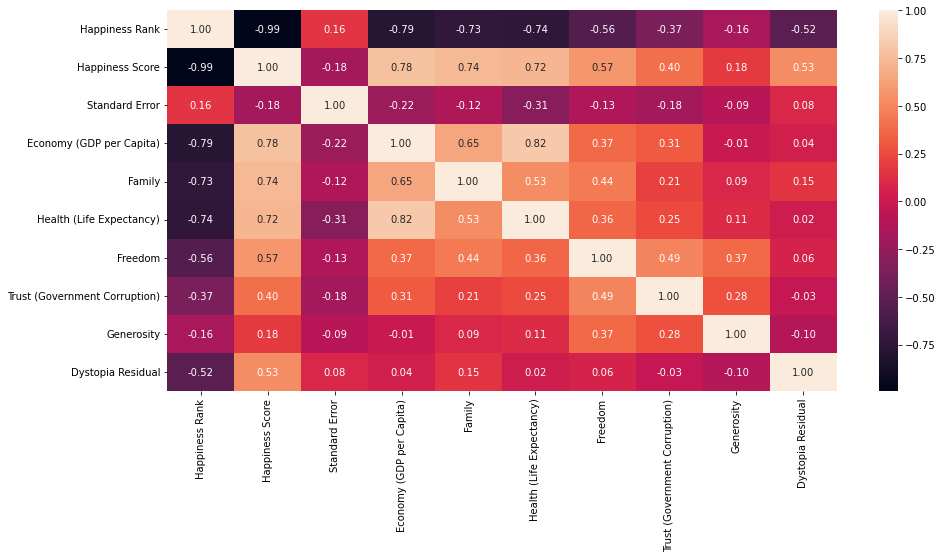

In [19]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df_Cont.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

# Observations on Correlation
All the feature-columns of the datasets are positively correlated with the target column except 'Happiness Rank' and 'Standard Error' columns. While two features can be seen to have a strong correlation with each other. Below are the summary of correlation;

Collinearity:
 - Happiness Rank has a negative correlation with the target column which can be considered as NO BOND AT ALL!
 - Standard Error has a negative correlation with the target column which can be considered as NO BOND AT ALL!
 - Generosity has 18 percent correlation with the target column which can be considered as a fairly good bond.
 - Trust (Government Corruption) has a 39 percent correlation with the target column which can be considered as a good bond.
 - Dystopia Residual  has a 53 percent correlation with the target column which can be considered as a good bond.
 - Freedom has a 56 percent correlation with the target column which can be considered as a good bond.
 - Health (Life Expectancy)  has 72 percent correlation with the target column which can be considered as a strong bond.
 - Family has a 74 percent correlation with the target column which can be considered as a very strong bond.
 - Economy (GDP per Capita) has a 78 percent correlation with the target column which can be considered as a very strong bond.
 - Max correlation = Economy (GDP per Capita)
 - Min Correlation = Happiness rank and Standard Error
 
Multicollinearity:Health (Life Expectancy) and Economy (GDP per Capita) has a correlation of 82 percent which is considered as a very strong bond.


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Outlier Checking

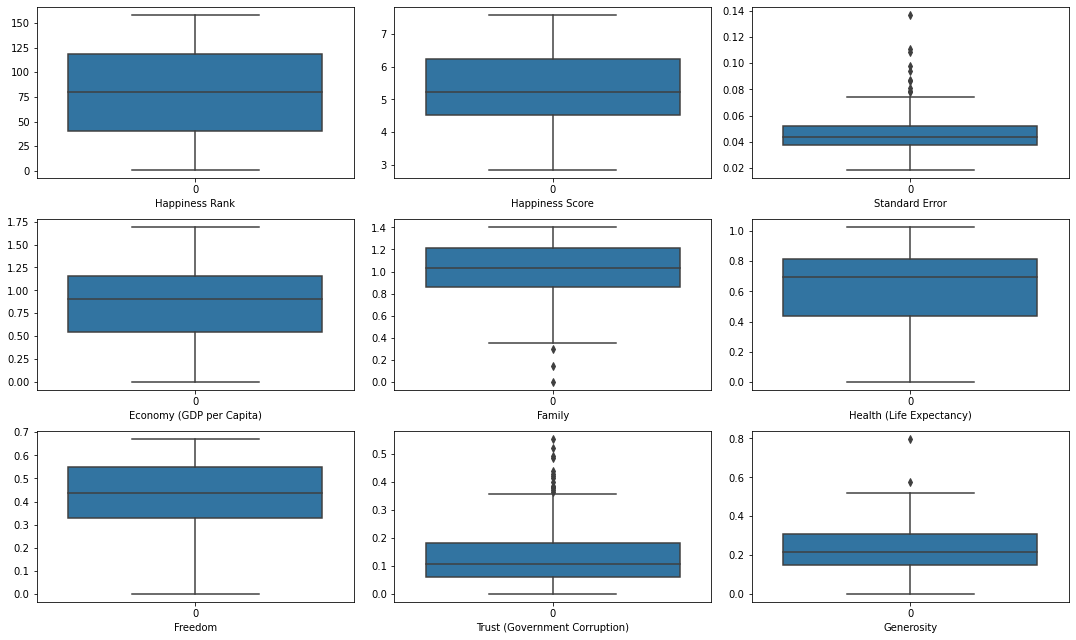

In [20]:
#Check for allien-datapoints in each column data
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_Cont:#triggering your for loop
    if graph<=9:#this was made 6 just to allow for 6 spaces
        plt.subplot(3,3,graph)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_Cont[column])#performing a box plot starting with rank
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Checking
From the above we can see;
 - That the columns below does not contain outliers(allien-datapoints)
   - Happiness Rank
   - Happiness Score
   - Economy (GDP per Capita)
   - Health (Life Expectancy)
   - Freedom  
 - That the features below have little outliers; 
   - Generosity
   - Family
 - That the features below have much outliers; 
   - Trust (Government Corruption)
   - Standard Error
 - That the Label; 'Happiness Score' has no outliers

# Skewness Checking

In [21]:
#Checking for geenral Skewness
df_Cont.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Observations on skewness: 
Lets assume Skewness threshold is taken as +/-0.65.Meaning any value outside +/-0.65 contains skewness. Hence Columns which are having skewness:

 - Standard Error
 - Family
 - Health (Life Expectancy) 
 - Trust (Government Corruption)
 - Generosity

# Step 4 - DATA PREPROCESSING

# Removal of Duplicates

In [22]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(158, 12)

 - It appears there are no duplicates since the rows did not decrease

# Dropping of Features with Poor Correlation wrt Target

In [23]:
#Checking the correlation with respect to the Label column
df_Cont.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

- Here we are setting threshold of correlation as +/-0.15, meaning any correlation outside +/-0.15 is assumed to be a strong       correlation. it is not standard. The dataset demands.

- In lieu of the above assumption, we have to drop 'Happiness Rank' and 'Standard Error' since its correlation is within           +/-0.15!

- Moreso, recall we assrted earlier that the two categorical columns - Country and Region does not impact our Targe, hence, will   have to drop them too.

In [24]:
#Dropping columns as stated
df=df.drop(columns=['Country','Region','Happiness Rank','Standard Error'],axis=1)
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Dropping of Features that strongly promotes multicollinearity

<AxesSubplot:>

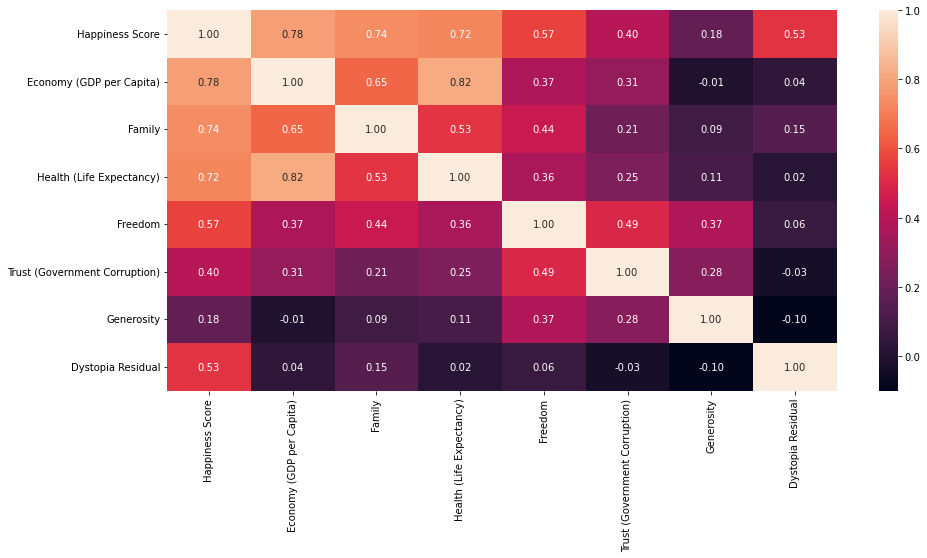

In [25]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

- From the heatmap above we can see that Health (Life Expectancy) and Economy (GDP per Capita) has a correlation of 82 percent which is considered as a very strong bond. This means we have to drop one of them

Choice on which feature to drop between the two?
- Recall that the correlation between the two features and Target looking at the heatmap above is;
  - Health (Life Expectancy)      - 72%
  - Economy (GDP per Capita)   - 78%

Hence we drop the feature with the lower correlation with the label! i.e Health (Life Expectancy) !

In [26]:
#Dropping columns as stated
df=df.drop(columns=['Health (Life Expectancy)'],axis=1)
df

,Happiness Score,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.11850,0.10062,0.19727,1.83302


# Removal of Outliers

In [27]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,Happiness Score,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,1.369621,1.320281,1.577438,2.309652,0.471040,0.758258
1,1.914581,1.135226,1.514458,1.332456,0.016480,1.575856,1.092857
2,1.884792,1.192861,1.361054,1.469659,2.842774,0.824293,0.712335
3,1.880411,1.525130,1.251922,1.605131,1.852081,0.868638,0.663893
4,1.797179,1.194876,1.221204,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...
153,1.674055,1.552987,0.800520,1.087740,3.413922,0.087228,2.588925
154,1.783571,1.392303,2.346860,0.372033,0.529210,0.433117,0.843967
155,2.076199,0.455245,1.901086,1.809238,0.381419,1.856891,3.208430
156,2.164688,2.067566,2.118467,2.064472,0.357715,0.316950,0.481985


In [28]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(158, 7)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [29]:
#index number
np.where(z>3)

(array([ 27, 128, 147, 153, 155, 157], dtype=int64),
 array([4, 5, 2, 4, 6, 2], dtype=int64))

In [30]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (158, 7)
New DataFrame (152, 7)
total_dropped_rows 6


In [31]:
#Checking the new dataframe with non-outliers
df_new

,Happiness Score,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328


# Transforming Data to Remove Skewness using Power transformation

In [32]:
#Firstly, replacing zero values with the mean of the Label(since they are all continuos data)
df_new['Happiness Score']=df_new['Happiness Score'].replace(0,df_new['Happiness Score'].mean())
df_new['Generosity']=df_new['Generosity'].replace(0,df_new['Generosity'].mean())
df_new['Trust (Government Corruption)']=df_new['Trust (Government Corruption)'].replace(0,df_new['Trust (Government Corruption)'].mean())
df_new['Freedom']=df_new['Freedom'].replace(0,df_new['Freedom'].mean())
df_new['Family']=df_new['Family'].replace(0,df_new['Family'].mean())

In [33]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [34]:
#extracting the columns that are skewed
data=['Happiness Score','Generosity','Trust (Government Corruption)','Freedom','Family']

In [35]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

# Seperating the datasets into Features and Target

In [36]:
#seperation
X=df_new.drop(columns=['Happiness Score'])
Y=df_new['Happiness Score']

# Transforming data into standard normal distribution

In [37]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 1.38120592e+00,  1.66761865e+00,  1.75871687e+00,
         1.82299910e+00,  6.61251478e-01,  7.47297602e-01],
       [ 1.13920813e+00,  2.02101058e+00,  1.44674940e+00,
         3.47559034e-01,  1.57161749e+00,  1.10115487e+00],
       [ 1.19871199e+00,  1.74015290e+00,  1.62028960e+00,
         1.95485899e+00,  9.83734673e-01,  6.98731589e-01],
       [ 1.54175845e+00,  1.54796798e+00,  1.79458551e+00,
         1.67330535e+00,  1.02194505e+00,  6.47501536e-01],
       [ 1.20079309e+00,  1.49499554e+00,  1.48187138e+00,
         1.55252701e+00,  1.69058693e+00,  6.21531943e-01],
       [ 1.10819726e+00,  1.46755978e+00,  1.55518802e+00,
         1.80830305e+00,  1.41775580e-01,  9.43114081e-01],
       [ 1.20888623e+00,  1.23293230e+00,  1.33874174e+00,
         1.50877315e+00,  1.78473381e+00,  6.48249000e-01],
       [ 1.21471843e+00,  1.28686017e+00,  1.70916953e+00,
         1.86569613e+00,  1.12608504e+00,  4.67113487e-01],
       [ 1.00524736e+00,  1.47643823e+00,  1.535

What standard scaler does is to bring mean to zero and standard deviation to 1

In [38]:
#reconfirming that mean is 0
X_Scaled.mean()

-5.4537271385095406e-17

In [39]:
#reconfirming that standard deviation is 1
X_Scaled.std()

0.9999999999999999

# Step 5 - THE ART OF CHOOSING THE BEST MODEL

In [40]:
lm=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor()

In [41]:
#initializing and calculating the random state at which model is at optimum performance
lm=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

At random state 20 The model performs very well
At random state:- 20
Training Accuracy score: -  97.5
At random state 47 The model performs very well
At random state:- 47
Training Accuracy score: -  97.5
At random state 60 The model performs very well
At random state:- 60
Training Accuracy score: -  97.5
At random state 62 The model performs very well
At random state:- 62
Training Accuracy score: -  97.5
At random state 90 The model performs very well
At random state:- 90
Training Accuracy score: -  97.4


In [42]:
#initializing and calculating the random state at which model is at optimum performance
knn=KNeighborsRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

At random state 48 The model performs very well
At random state:- 48
Training Accuracy score: -  92.8
At random state 87 The model performs very well
At random state:- 87
Training Accuracy score: -  92.4


In [43]:
#initializing and calculating the random state at which model is at optimum performance
ada=AdaBoostRegressor()
for i in range(0,5000):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

At random state 2824 The model performs very well
At random state:- 2824
Training Accuracy score: -  94.4


In [44]:
#initializing and calculating the random state at which model is at optimum performance
dt=DecisionTreeRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

In [45]:
#initializing and calculating the random state at which model is at optimum performance
rf=RandomForestRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

In [46]:
#initializing and calculating the random state at which model is at optimum performance
gb=GradientBoostingRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

In [47]:
#initializing and calculating the random state at which model is at optimum performance
xgb=XGBRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

- From the above only LinearRegression(97.5% at 47),KNN(92.8% at 48) and AdaBoost(94.4% at 2824) gave us a random state were the Accuracy Score of both train and test matches!

FROM THE ABOVE, HENCE LinearRegression IS THE BEST MODEL!!

# Splitting into train and test - LinearRegression

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=47,test_size=0.20)

# Accuracy Score

In [49]:
#Write one function and call as many as times to check Accuracy of different models
def metric_r2_score(rgr,x_train,x_test,y_train,y_test,train=True):
    rgr.fit(x_train,y_train)
    if train:#i.e if train is equal to true since it has been set as true in the argument of the def statement
        pred_train = rgr.predict(x_train)
        print("\n====================Train Result=================")
        print(f"Accuracy Score: {metrics.r2_score(y_train, pred_train)*100:.2f}%")#:.2f means convert to 2 decimal places 
    elif train==False:
        pred_test=rgr.predict(x_test)
        print("\n====================Test Result=================")
        print(f"Accuracy Score: {metrics.r2_score(y_test, pred_test)*100:.2f}%")

# LinearRegression - Accuracy(r2 score)

In [50]:
#Checking for accuracy score(r2) for both train and test
metric_r2_score(lm,x_train,x_test,y_train,y_test, train=True)#This is for training score
metric_r2_score(lm,x_train,x_test,y_train,y_test, train=False)#This is for testing score


====================Train Result=================
Accuracy Score: 97.54%

====================Test Result=================
Accuracy Score: 97.46%


# Cross Validation Score
Now lets use Cross Validation Score to check if model is overfitting

In [51]:
cross_val_score(lm, X_Scaled, Y, cv=2)

array([0.92024881, 0.54553221])

In [52]:
#taking the mean of the above array
cross_val_score(LinearRegression(),X_Scaled,Y,cv=2).mean()

0.7328905125948799

# Step 6 - HYPERPARAMETER TUNNING
- Using RidgeCV

In [53]:
ridgecv=RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)#We use (0.001,0.1,0.01) as the argument for the arange because we dont how long it will take if we use other sets of argument
ridgecv.fit(x_train, y_train)#Training and preparing to find the best learning rate or alpha

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [54]:
#Finding the best alpha or learning rate
alpha_ridgecv=ridgecv.alpha_
alpha_ridgecv

0.001

In [55]:
#instantiating into ridge_reg
ridge_reg=Ridge(alpha_ridgecv)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.001)

In [56]:
#Calling our def function once again
metric_r2_score(ridge_reg,x_train,x_test,y_train,y_test, train=True)#This is for training score
metric_r2_score(ridge_reg,x_train,x_test,y_train,y_test, train=False)#This is for testing score


====================Train Result=================
Accuracy Score: 97.54%

====================Test Result=================
Accuracy Score: 97.46%


- We have concluded with our Tunning, however there are not much changes!

# Step 7 - Model Saving

In [57]:
filename='Machine_Model_Project_Happinnes Report'
pickle.dump(lm,open(filename,'wb'))